# Tomato Leaf Disease Detection

## Importing the Libraries

In [1]:
import tensorflow as tf
import pandas as pd 
from tensorflow.keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob

## Importing the Dataset

In [8]:
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = 'D:/Github/tomato leaf disease detection/tomato/train/'
valid_path = 'D:/Github/tomato leaf disease detection/tomato/val/'

#### Inception V3

In [3]:
# Import the InceptionV3 model and here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 19s 0us/step


In [4]:
# We don't need to train existing weights
for layer in inception.layers:
    layer.trainable = False

In [9]:
# Folders in the Training Set
folders = glob('D:/Github/tomato leaf disease detection/tomato/train/*')
folders

['D:/Github/tomato leaf disease detection/tomato/train\\Tomato___Bacterial_spot',
 'D:/Github/tomato leaf disease detection/tomato/train\\Tomato___Early_blight',
 'D:/Github/tomato leaf disease detection/tomato/train\\Tomato___healthy',
 'D:/Github/tomato leaf disease detection/tomato/train\\Tomato___Late_blight',
 'D:/Github/tomato leaf disease detection/tomato/train\\Tomato___Leaf_Mold',
 'D:/Github/tomato leaf disease detection/tomato/train\\Tomato___Septoria_leaf_spot',
 'D:/Github/tomato leaf disease detection/tomato/train\\Tomato___Spider_mites Two-spotted_spider_mite',
 'D:/Github/tomato leaf disease detection/tomato/train\\Tomato___Target_Spot',
 'D:/Github/tomato leaf disease detection/tomato/train\\Tomato___Tomato_mosaic_virus',
 'D:/Github/tomato leaf disease detection/tomato/train\\Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [10]:
# Model layers -> can add more if required
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [11]:
# Create a model object
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [12]:
# Defining the cost and model optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Training Generator
training_set = train_datagen.flow_from_directory('D:/Github/tomato leaf disease detection/tomato/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [15]:
# Testing Generator
test_set = test_datagen.flow_from_directory('D:/Github/tomato leaf disease detection/tomato/val/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1000 images belonging to 10 classes.


In [16]:
# fit the model, it will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\yoges\AppData\Local\Temp/ipykernel_16264/1141776482.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
313/313 [==============================] - 503s 2s/step - loss: 3.1826 - accuracy: 0.6439 - val_loss: 3.2388 - val_accuracy: 0.6710
Epoch 2/10
313/313 [==============================] - 378s 1s/step - loss: 1.9983 - accuracy: 0.7697 - val_loss: 2.8640 - val_accuracy: 0.7250
Epoch 3/10
313/313 [==============================] - 396s 1s/step - loss: 1.7390 - accuracy: 0.8145 - val_loss: 3.4121 - val_accuracy: 0.7140
Epoch 4/10
313/313 [==============================] - 310s 988ms/step - loss: 1.8517 - accuracy: 0.8212 - val_loss: 3.4442 - val_accuracy: 0.7370
Epoch 5/10
313/313 [==============================] - 246s 784ms/step - loss: 1.8031 - accuracy: 0.8355 - val_loss: 3.0745 - val_accuracy: 0.7960
Epoch 6/10
313/313 [==============================] - 246s 786ms/step - loss: 1.6042 - accuracy: 0.8608 - val_loss: 3.6754 - val_accuracy: 0.7610
Epoch 7/10
313/313 [==============================] - 245s 783ms/step - loss: 1.6038 - accuracy: 0.8603 - val_loss: 2.9573 - val_accu

## Visualize the model training by plotting Loss Function and Accuracy

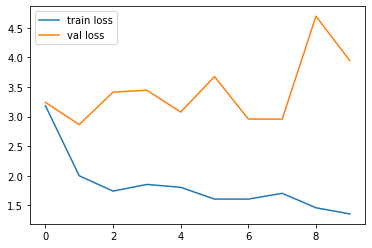

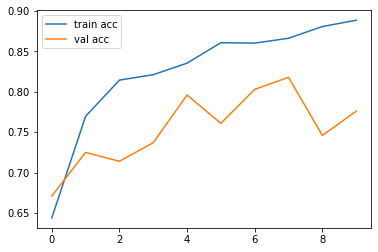

<Figure size 432x288 with 0 Axes>

In [17]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [19]:
y_pred = model.predict(test_set)
y_pred

array([[1.91723886e-21, 2.06494056e-20, 1.48488126e-15, ...,
        0.00000000e+00, 3.49880157e-31, 4.54264921e-30],
       [4.15567734e-25, 1.00000000e+00, 9.08196138e-17, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.74607217e-29, 1.52126880e-14, 4.75594997e-12, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.41224043e-30, 1.63097705e-27, 0.00000000e+00, ...,
        0.00000000e+00, 2.75033926e-34, 1.66409340e-24],
       [1.75622618e-31, 4.40009549e-27, 1.10221375e-30, ...,
        0.00000000e+00, 0.00000000e+00, 5.31853782e-03],
       [1.35476337e-23, 4.20154134e-15, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], dtype=float32)

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([5, 1, 6, 7, 5, 3, 6, 4, 9, 9, 9, 6, 3, 7, 3, 8, 8, 1, 4, 3, 6, 9,
       7, 6, 4, 4, 4, 6, 8, 5, 0, 5, 0, 9, 9, 0, 0, 4, 9, 2, 5, 7, 9, 4,
       9, 5, 2, 3, 0, 4, 9, 5, 6, 7, 0, 9, 8, 8, 1, 4, 7, 4, 5, 7, 9, 0,
       5, 5, 0, 5, 9, 5, 5, 1, 3, 9, 4, 3, 5, 7, 9, 7, 7, 5, 2, 2, 4, 0,
       4, 1, 6, 7, 6, 7, 9, 3, 0, 2, 0, 2, 5, 9, 7, 7, 1, 3, 9, 6, 9, 0,
       2, 3, 0, 7, 8, 2, 5, 1, 1, 5, 5, 6, 4, 4, 5, 3, 6, 6, 4, 4, 6, 2,
       6, 8, 3, 9, 5, 6, 4, 9, 1, 6, 5, 4, 4, 6, 8, 0, 4, 2, 0, 5, 4, 7,
       8, 5, 1, 0, 0, 7, 8, 4, 8, 6, 7, 2, 8, 2, 6, 0, 0, 6, 5, 6, 5, 1,
       4, 1, 4, 5, 1, 6, 6, 8, 6, 7, 6, 2, 5, 0, 7, 7, 4, 2, 2, 8, 8, 2,
       4, 5, 1, 2, 7, 0, 2, 4, 2, 2, 2, 5, 2, 9, 5, 4, 5, 3, 4, 1, 2, 3,
       2, 8, 4, 0, 8, 4, 9, 2, 6, 4, 0, 7, 5, 3, 5, 5, 2, 5, 5, 6, 6, 4,
       5, 9, 5, 6, 2, 9, 6, 8, 6, 4, 4, 4, 7, 4, 3, 6, 1, 7, 5, 6, 7, 1,
       8, 4, 2, 5, 9, 0, 5, 5, 6, 6, 1, 2, 6, 8, 0, 8, 7, 6, 9, 8, 2, 0,
       0, 8, 5, 3, 0, 4, 1, 3, 4, 8, 0, 5, 5, 0, 8,